1. Can we use Bagging for regression problems?

Answer:

Yes, bagging can be used for regression problems by using base regressors (like DecisionTreeRegressor) instead of classifiers. This is implemented in scikit-learn as BaggingRegressor.

2. What is the difference between multiple model training and single model training?

Answer:

Single model training uses one algorithm trained on the entire dataset, while multiple model training (ensemble methods) combines several models to improve performance, accuracy, and robustness.

3. Explain the concept of feature randomness in Random Forest.

Answer:

In Random Forest, feature randomness is introduced by selecting a random subset of features at each split in the decision tree. This helps in reducing overfitting and increases model diversity.

4. What is OOB (Out-of-Bag) Score?

Answer:

OOB Score is the accuracy score computed using data not included in the bootstrap sample (out-of-bag samples). It serves as a validation technique for ensemble models like Random Forest.

5. How can you measure the importance of features in a Random Forest model?

Answer:

Feature importance is measured by the average decrease in impurity (like Gini or Entropy) caused by that feature across all trees in the forest.

6. Explain the working principle of a Bagging Classifier.

Answer:

A Bagging Classifier creates multiple subsets of the original dataset using bootstrap sampling, trains a base classifier on each, and combines their outputs using majority voting.

7. How do you evaluate a Bagging Classifier’s performance?

Answer:

Using metrics like accuracy, confusion matrix, precision, recall, F1-score, and cross-validation. OOB score can also be used if bootstrap=True and oob_score=True.

8. How does a Bagging Regressor work?

Answer:

It trains multiple regressors on random bootstrapped subsets and combines their outputs by averaging the predictions to reduce variance and improve accuracy.

9. What is the main advantage of ensemble techniques?

Answer:

Ensemble techniques improve performance by reducing overfitting and variance, enhancing generalization, and providing more stable and accurate predictions.

10. What is the main challenge of ensemble methods?

Answer:

Ensemble methods can be computationally expensive, harder to interpret, and may overfit if the base learners are too complex or if the ensemble is poorly configured.

11. Explain the key idea behind ensemble techniques.

Answer:

The key idea is to combine predictions from multiple models to produce a final result that is more accurate and robust than any single model.

12. What is a Random Forest Classifier?

Answer:

A Random Forest Classifier is an ensemble method that builds multiple decision trees using random subsets of data and features and outputs the class based on majority voting.

13. What are the main types of ensemble techniques?

Answer:

Bagging (Bootstrap Aggregating)

Boosting (e.g., AdaBoost, Gradient Boosting)

Stacking

Voting

14. What is ensemble learning in machine learning?

Answer:

Ensemble learning is the technique of combining multiple models (learners) to solve a problem and improve overall performance compared to a single model.

15. When should we avoid using ensemble methods?

Answer:

Avoid ensemble methods when:

Interpretability is crucial

The base model already performs well

Computational resources are limited

The dataset is very small

16. How does Bagging help in reducing overfitting?

Answer:

Bagging reduces overfitting by training on different bootstrapped datasets and averaging the predictions, which reduces variance and prevents the model from learning noise.

17. Why is Random Forest better than a single Decision Tree?

Answer:

Random Forest combines multiple decision trees to reduce variance and overfitting, resulting in better accuracy and robustness compared to a single decision tree.

18. What is the role of bootstrap sampling in Bagging?

Answer:

Bootstrap sampling helps in creating diverse subsets of data by sampling with replacement, which increases the diversity of models and helps reduce variance.

19. What are some real-world applications of ensemble techniques?

Answer:

Fraud detection

Credit scoring

Disease diagnosis

Image and speech recognition

Stock market prediction

20. What is the difference between Bagging and Boosting?

Answer:

Bagging builds models independently in parallel using random subsets to reduce variance.

Boosting builds models sequentially, each focusing on the errors of the previous, reducing bias and variance.



In [3]:
# Practical Question 21

# Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
# Changed base_estimator to estimator to fix the TypeError
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)
print("Accuracy (Bagging Classifier):", accuracy_score(y_test, y_pred))

# Practical Question 22

# Train a Bagging Regressor and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
# Changed base_estimator to estimator to be consistent with BaggingClassifier
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_test)
print("MSE (Bagging Regressor):", mean_squared_error(y_test, y_pred))

# Practical Question 23

# Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = data.feature_names
print("Feature Importances (Random Forest Classifier):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

# Practical Question 24

# Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
dt_pred = dt_regressor.predict(X_test)
print("R2 Score (Random Forest Regressor):", r2_score(y_test, rf_pred))
print("R2 Score (Decision Tree Regressor):", r2_score(y_test, dt_pred))

# Practical Question 25

# Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

rf_oob_model = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf_oob_model.fit(X_train, y_train)
print("OOB Score (Random Forest Classifier):", rf_oob_model.oob_score_)

Accuracy (Bagging Classifier): 1.0
MSE (Bagging Regressor): 0.2824242776841025
Feature Importances (Random Forest Classifier):
mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052
R2 Score (Random Forest Regressor): 0.8605413691451032
R2 Score (Decision Tree Regressor): 0.7759580740255486
OOB Score (Random Forest Classifier): 

In [5]:
# Practical Question 26
# Implement a Voting Classifier using Logistic Regression, Decision Tree, and KNN
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
# Use Iris dataset for training and testing
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf1 = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

# Train the voting classifier using the Iris dataset split
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')

voting_clf.fit(X_train_iris, y_train_iris)
y_pred = voting_clf.predict(X_test_iris)
print("Accuracy (Voting Classifier):", accuracy_score(y_test_iris, y_pred))

# Practical Question 27
# Implement a Voting Regressor using SVR, Decision Tree Regressor and KNN Regressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor here as well

housing = fetch_california_housing()
# Use Housing dataset for training and testing (these variables will be overwritten in the next block)
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

reg1 = SVR()
reg2 = DecisionTreeRegressor()
reg3 = KNeighborsRegressor()

voting_reg = VotingRegressor(estimators=[
    ('svr', reg1), ('dt', reg2), ('knn', reg3)])
voting_reg.fit(X_train, y_train)
pred = voting_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
print("MSE (Voting Regressor):", mean_squared_error(y_test, pred))

# Practical Question 28
# Compare the accuracy of Voting Classifier with individual classifiers
# Re-assign X_train, X_test, y_train, y_test to the Iris dataset for classification comparison
X_train, X_test, y_train, y_test = X_train_iris, X_test_iris, y_train_iris, y_test_iris

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))
print("KNN Accuracy:", accuracy_score(y_test, y_pred3))
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred)) # y_pred here is from the voting_clf trained on Iris

# Practical Question 29
# Build a simple Stacking Classifier using Logistic Regression as final estimator
from sklearn.ensemble import StackingClassifier

# Ensure Stacking Classifier also uses the Iris dataset
base_learners = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]
final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_estimator)
stacking_clf.fit(X_train, y_train) # X_train, y_train are currently the Iris data
stack_pred = stacking_clf.predict(X_test)
print("Accuracy (Stacking Classifier):", accuracy_score(y_test, stack_pred))

# Practical Question 30
# Evaluate the performance of Stacking Classifier vs Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_clf.predict(X_test))) # voting_clf trained on Iris
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_clf.predict(X_test))) # stacking_clf trained on Iris

Accuracy (Voting Classifier): 1.0
MSE (Voting Regressor): 0.6703654701704942
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
KNN Accuracy: 1.0
Voting Classifier Accuracy: 1.0
Accuracy (Stacking Classifier): 1.0
Voting Classifier Accuracy: 1.0
Stacking Classifier Accuracy: 1.0


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (GridSearchCV): 0.9583333333333334


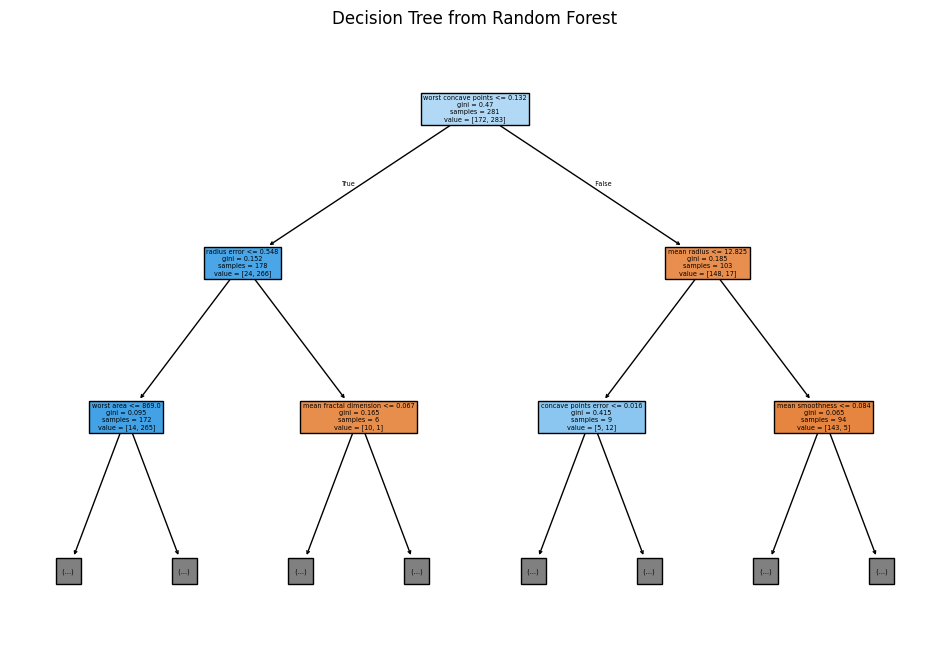

Top 5 Important Features:
                  Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001
Cross-Validation Scores (Bagging Classifier): [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]
Average CV Score: 0.9508306163639186
Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0


In [6]:
# Practical Question 31
# Perform hyperparameter tuning on Random Forest Classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Best Score (GridSearchCV):", grid_search.best_score_)

# Practical Question 32
# Visualize a Decision Tree from Random Forest
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Extract one tree
plt.figure(figsize=(12, 8))
plot_tree(estimator, feature_names=data.feature_names, filled=True, max_depth=2)
plt.title("Decision Tree from Random Forest")
plt.show()

# Practical Question 33
# Perform feature selection using feature importances from Random Forest
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top 5 Important Features:\n", feature_importance_df.head())

# Practical Question 34
# Use cross_val_score to evaluate a Bagging Classifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bagging_model, data.data, data.target, cv=5)
print("Cross-Validation Scores (Bagging Classifier):", scores)
print("Average CV Score:", scores.mean())

# Practical Question 35
# Compare the performance of Bagging vs Random Forest on the same dataset
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

bagging_score = accuracy_score(y_test, bagging_model.predict(X_test))
rf_score = accuracy_score(y_test, rf_model.predict(X_test))

print("Bagging Accuracy:", bagging_score)
print("Random Forest Accuracy:", rf_score)


In [8]:
# Practical 36: Train a Gradient Boosting Classifier on the iris dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print("Accuracy (Gradient Boosting Classifier):", accuracy_score(y_test, y_pred))


# Practical 37: Train an AdaBoost Classifier on the iris dataset
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Changed 'base_estimator' to 'estimator' to fix the TypeError
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                             n_estimators=100, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print("Accuracy (AdaBoost Classifier):", accuracy_score(y_test, y_pred_ada))


# Practical 38: Compare accuracy of AdaBoost and Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


# Practical 39: Train a Gradient Boosting Regressor on California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train_h, y_train_h)
y_pred_gbr = gb_reg.predict(X_test_h)
print("MSE (Gradient Boosting Regressor):", mean_squared_error(y_test_h, y_pred_gbr))


# Practical 40: Train an AdaBoost Regressor on California housing dataset
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_reg.fit(X_train_h, y_train_h)
y_pred_ada_r = ada_reg.predict(X_test_h)
print("MSE (AdaBoost Regressor):", mean_squared_error(y_test_h, y_pred_ada_r))

Accuracy (Gradient Boosting Classifier): 1.0
Accuracy (AdaBoost Classifier): 1.0
Gradient Boosting Accuracy: 1.0
AdaBoost Accuracy: 1.0
MSE (Gradient Boosting Regressor): 0.2939973248643864
MSE (AdaBoost Regressor): 0.568195768061393


Accuracy (Voting Classifier): 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
SVC Accuracy: 1.0
Voting Classifier Accuracy: 1.0
Accuracy (Stacking Classifier): 1.0
Voting Classifier Accuracy: 1.0
Stacking Classifier Accuracy: 1.0


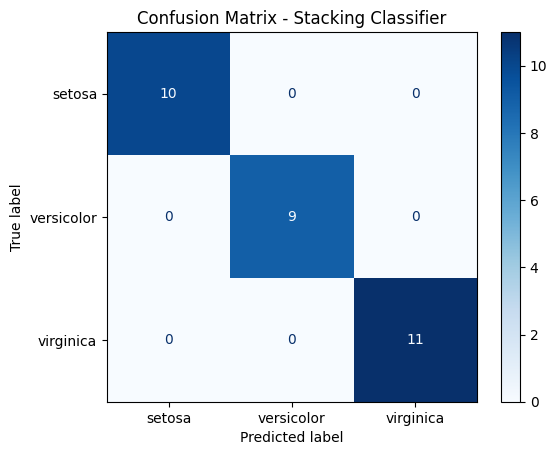

In [9]:
# Practical 41: Train a Voting Classifier on the iris dataset
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression(max_iter=200, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Accuracy (Voting Classifier):", accuracy_score(y_test, y_pred_voting))


# Practical 42: Compare individual classifiers with Voting Classifier
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

print("Logistic Regression Accuracy:", accuracy_score(y_test, clf1.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, clf2.predict(X_test)))
print("SVC Accuracy:", accuracy_score(y_test, clf3.predict(X_test)))
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


# Practical 43: Train a Stacking Classifier on the iris dataset
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

estimators = [('lr', clf1), ('dt', clf2)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=GaussianNB())

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print("Accuracy (Stacking Classifier):", accuracy_score(y_test, y_pred_stacking))


# Practical 44: Compare Voting vs Stacking
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))


# Practical 45: Visualize Confusion Matrix for Ensemble Models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()
